In [17]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import trapz

In [19]:
df = pd.DataFrame([[1,0, 0.592837], [2,1, 0.624829], [3, 0, 0.073848], [4, 1, 0.544891], [5, 0, 0.015118]], columns=["index", "class", "predicted_prob"])
df.head()

,index,class,predicted_prob
0,1,0,0.592837
1,2,1,0.624829
2,3,0,0.073848
3,4,1,0.544891
4,5,0,0.015118


In [20]:
def perf_metrics(y_actual, y_hat,threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(len(y_hat)): 
        if(y_hat[i] >= threshold):
            if(y_actual[i] == 1):
                tp += 1
            else:
                fp += 1
        elif(y_hat[i] < threshold):
            if(y_actual[i] == 0):
                tn += 1
            else:
                fn += 1
    
    #We find the True positive rate and False positive rate based on the threshold
            
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)

    return [fpr,tpr]

In [21]:
fpr,tpr =perf_metrics(df['class'],df['predicted_prob'],0.5)
fpr, tpr

(0.3333333333333333, 1.0)

In [10]:
#Sensitivity is When it's actually yes, how often does it predict yes? Same as TPR
#Specificity is  When it's actually no, how often does it predict no? Same as (1-FPR)
print('Sensitivity: {} ,'.format(round(tpr,2)),'Specificity: {}'.format(round(1-fpr,2)))

Sensitivity: 1.0 , Specificity: 0.67


In [11]:
#Now we calculate FPR and TPR for different thresholds and get AUC and ROC
thresholds = [0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1]

roc_points = []
for threshold in thresholds:
    rates = perf_metrics(df['class'], df['predicted_prob'], threshold)
    roc_points.append(rates)

In [12]:
fpr_array = []
tpr_array = []
for i in range(len(roc_points)-1):
    point1 = roc_points[i];
    point2 = roc_points[i+1]
    tpr_array.append([point1[0], point2[0]])
    fpr_array.append([point1[1], point2[1]])

In [22]:
#We use Trapezoidal rule to calculate the area under the curve and approximating the intergral  
auc = sum(np.trapz(tpr_array,fpr_array))+1
print('Area under curve={}'.format(auc))

Area under curve=0.8333333333333334


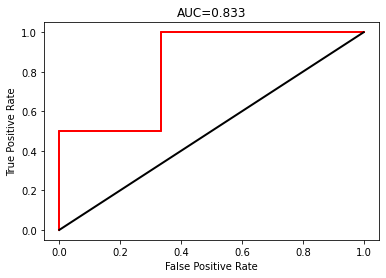

In [23]:
plt.plot(tpr_array,fpr_array, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC={}'.format(round(auc,3)))
plt.show()

In [10]:
#Area Under the Curve is the percentage of this box that is under this curve.
#This classifier has an AUC of around 0.88 which indicates it is a decent classifier. 

In [1]:
from scipy.io import loadmat

actual=loadmat('actual.mat');
predicted=loadmat('predicted.mat');

labels=actual['target'][:,0];
predictions=predicted['neuralOut'][:,0]; 

In [2]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [2]:
predictions

array([0.82714215, 0.60445959, 0.79163409, 0.16080518, 0.61122292,
       0.25550873, 0.56815077, 0.0599057 , 0.66444341, 0.11293577,
       0.06152372, 0.35250697, 0.32267018, 0.43339115, 0.22807443,
       0.72198484, 0.23527699, 0.28502453, 0.41070479, 0.20083562,
       0.37119218, 0.42348227, 0.4876482 , 0.42348227, 0.57509852,
       0.67340477, 0.73558926, 0.71378991, 0.38739725, 0.24042033,
       0.16634116, 0.16634116, 0.28502453, 0.36837418, 0.17375785,
       0.43636291, 0.72198484, 0.46745878, 0.23527699, 0.17202866,
       0.17786914, 0.4433536 , 0.27685038, 0.06891755, 0.21414011,
       0.27120595, 0.26328217, 0.48056205, 0.0884856 , 0.25550873,
       0.56815077, 0.28502453, 0.84221642, 0.52808205, 0.63027285,
       0.93251628, 0.06222562, 0.8823445 , 0.67073977, 0.89166341,
       0.64892548, 0.55521198, 0.75102755, 0.23310831, 0.29334213,
       0.60445959, 0.63027285, 0.9585115 , 0.93428007, 0.32267018,
       0.79823018, 0.22102863, 0.9390781 , 0.50787801, 0.73793

In [4]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(labels, predictions)
print('AUC: %.3f' % auc)

AUC: 0.792
